In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Using glob, loop through the census files available and load them into DataFrames.

In [97]:
files = glob.glob('states*.csv')
df_list = []
for filename in files:
    data = pd.read_csv(filename)
    df_list.append(data)

census_data = pd.concat(df_list)

### Analyzing columns and data types in (us_census) DtaaFrame. 

In [98]:
census_data.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [99]:
census_data.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [100]:
census_data.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


### Changing ** Income ** column type object into numerical.

In [101]:
census_data.Income = census_data['Income'].replace('[\$,]', '', regex=True)

In [102]:
census_data.Income = pd.to_numeric(census_data.Income)

In [103]:
census_data.Income.head()

0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
Name: Income, dtype: float64

### Spliting ** GenderPop ** column into 2 column * Men and * Women 

In [125]:
census_data['gender_split'] = census.GenderPop.str.split('_')

In [126]:
census_data['Men'] = census_data.gender_split.str.get(0)
census_data['Women'] = census_data.gender_split.str.get(1)

In [127]:
census_data.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,gender_split,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,"[510388M, 543273F]",510388M,543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,"[2322409M, 2455167F]",2322409M,2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,"[423477M, 419713F]",423477M,419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,"[3167756M, 3331859F]",3167756M,3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,"[13171316M, 13367298F]",13171316M,13367298F


In [128]:
census_data['Men'] = census_data.Men.str[:-1]
census_data['Women'] = census_data.Women.str[:-1]

In [129]:
census_data.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,gender_split,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,"[510388M, 543273F]",510388,543273
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,"[2322409M, 2455167F]",2322409,2455167
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,"[423477M, 419713F]",423477,419713
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,"[3167756M, 3331859F]",3167756,3331859
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,"[13171316M, 13367298F]",13171316,13367298


In [130]:
census_data['Men'] = pd.to_numeric(census_data['Men'])
census_data['Women'] = pd.to_numeric(census_data['Women'])

In [131]:
census_data.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,gender_split,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,"[510388M, 543273F]",510388,543273.0
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,"[2322409M, 2455167F]",2322409,2455167.0
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,"[423477M, 419713F]",423477,419713.0
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,"[3167756M, 3331859F]",3167756,3331859.0
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,"[13171316M, 13367298F]",13171316,13367298.0


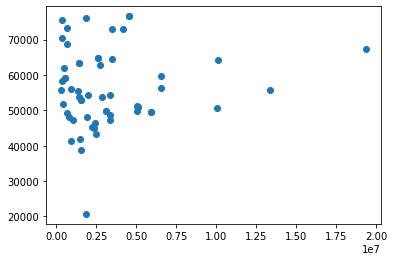

In [133]:
plt.scatter(census_data['Women'], census_data['Income'])
plt.show()


### Filling the ** Women ** --  NaN values --  by estimating totalPop - men 

In [135]:
census_data['Women']

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0           NaN
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1           NaN
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5           NaN
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
Name: Women, dtype: float64

In [138]:
census_data['Women'] = census_data['Women'].fillna(census_data['TotalPop'] - census_data['Men'])

In [139]:
census_data['Women']

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
Name: Women, dtype: float64

### Checking Duplicates

In [143]:
census_data.duplicated('Women')

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [146]:
census_data = census_data.drop_duplicates('Women')

In [147]:
census_data.duplicated('Women')

0    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
1    False
2    False
3    False
4    False
0    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
0    False
1    False
2    False
3    False
4    False
0    False
1    False
2    False
3    False
4    False
dtype: bool

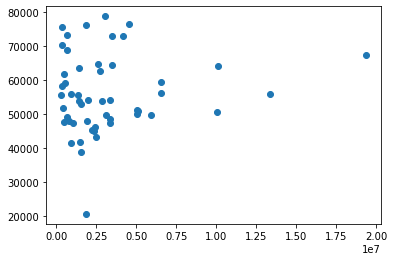

In [148]:
plt.scatter(census_data['Women'], census_data['Income'])
plt.show()

In [157]:
census_data = census_data.drop_duplicates('Men')

### Making Histogram for each Race in data.

In [162]:
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    for index in range(0,len(census_data)):    
        string = str(census_data[race].iat[index])
        replace = string.replace('%', '')
        if (replace == "nan"):
            replace = ""
        census_data[race].iat[index] = replace
    census_data[race] = pd.to_numeric(census_data[race])
    
census_data['Pacific'] = census_data['Pacific'].fillna(100 - census_data['Hispanic'] - census_data['White'] - census_data['Black'] - census_data['Native'] - census_data['Asian'])



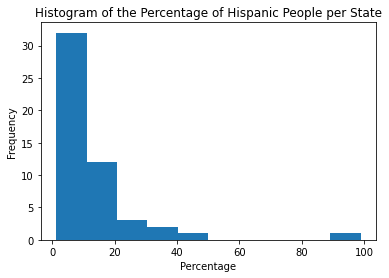

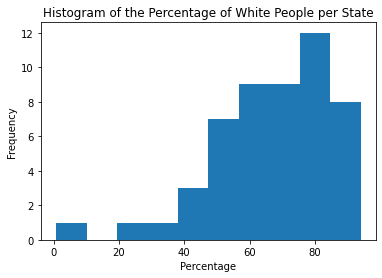

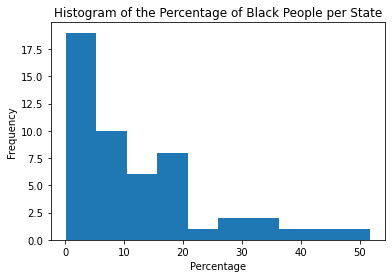

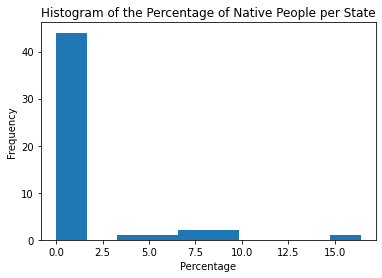

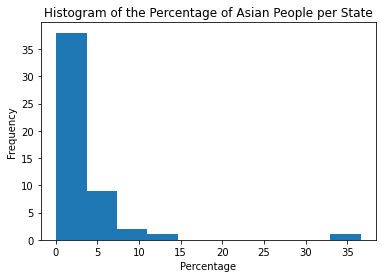

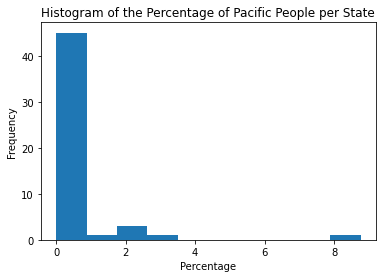

<Figure size 432x288 with 0 Axes>

In [163]:
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(census_data[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()